# Assignment-3 (Model interpretability)

Abstract-
The aim of this assignment is to develop a prediction model to determine if a person is suffering from   diabetes or not based on some predicted variables/independent variable.

In this notebook we will perform following activities.
1.Fit a linear model and interpret nodes.

2.Fit a tree-based model and interpret the nodes

3.Use auto ml to find the best model

4.Run SHAP analysis on the models from steps 1, 2, and 3,interpret the SHAP values and compare them with the other   model interpretability methods.


Description of dataset-
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).


Description of data fields-

1)Pregnancies: To express the Number of pregnancies

2)Glucose: To express the Glucose level in blood

3)BloodPressure: To express the Blood pressure measurement

4)SkinThickness: To express the thickness of the skin

5)Insulin: To express the Insulin level in blood

6)BMI: To express the Body mass index

7)DiabetesPedigreeFunction: To express the Diabetes percentage

8)Age: To express the age

9)Outcome: To express the final result 1 is Yes and 0 is No

### Summary
1)In below code we will begin with impoting various libraries needed during the implementations and after that we will directly import the dataset from kaggle and after that we will look for the data in dataset using .head command and then split the data in test and train cases for both predicted variable and independent variable and then will implement logistic regression and will find which variable has highest importance and which one has least importance for determining the final outcome.

2)Secondly we will implement same steps of splitting data into training and test data and further we will use Xgboost to implement decision tree algorithm and will find the least and most important variable for determining the dependent variable.

3)Third we will install h20 ,initialise it on our dataset and further will find best fit algorithm for the dataset.

4)In the end we will apply shap analysis in all the above 3 tests and will find if all of them are giving same outcomes or different outcome.

## Some installations further needed in the assignment

The pydotplus library is a Python interface to Graphviz's Dot language. It is often used in conjunction with other libraries, such as scikit-learn or networkx, for visualizing decision trees, graphs, and other structures.

If we're working with decision trees, for example, we might use pydotplus to visualize the tree generated by a machine learning model and in this assignment we are using decion tree and random forest.

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


# Loading Libraries

In [2]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np 
#plotting data and create visualization
import matplotlib.pyplot as plt           
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance


In [3]:
import opendatasets as od

In [4]:
dataset='https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'

In [5]:
od.download(dataset)

Skipping, found downloaded files in "./diabetes-dataset" (use force=True to force download)


In [6]:
import os

In [7]:
data_dir='./diabetes-dataset'

In [8]:
os.listdir(data_dir)

['diabetes.csv']

We are using above code in cells to retrieve data directly from kaggle.

In [9]:
data = pd.read_csv('./diabetes-dataset/diabetes.csv')

## Data checking

In [10]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

data.head,I have put 10 in the paramentric value just to get top 10 values inserted in the dataset.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This above snippet will basically shows the datatypes of all the paramenters used in dataset and there are 7 variables in integer form and 2 variables in float form.and this data set is classified dataset as the dependent variable "outcome" has only 2 values 0 and 1 where 0 refers to no diabetes and 1 refers to diabetes.

In [12]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Splitting the data into training and testing dataset

In [14]:
y= data.Outcome

In [15]:
x=data.drop('Outcome',axis=1)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Linear model building using Logistic Regression

In [17]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/Users/sanatpopli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In above code we have fit the model to the training data using the fit method, where x_train is the feature matrix and y_train is the target variable.


In [18]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
     

coef
DiabetesPedigreeFunction  1.537067
Pregnancies               0.095602
BMI                       0.079525
Glucose                   0.029044
Age                       0.017744
Insulin                  -0.000018
SkinThickness            -0.004441
BloodPressure            -0.017421

### Convert above log odd functions to regular odds:

Fit a linear model and interpret the regression coefficients
Ans: When the variable DiabetesPedigreeFunction is increased by one unit, the odds of having Diabetes in the target class ("2") increase by more than 1x (i.e. 4.6509) compared to the odds of not having Diabetes in the target class. In contrast, as BloodPressure concentration rises by one unit, the chances of lung cancer in the target class rise by only 0.982730.

In [19]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
DiabetesPedigreeFunction  4.650930
Pregnancies               1.100321
BMI                       1.082773
Glucose                   1.029470
Age                       1.017903
Insulin                   0.999982
SkinThickness             0.995569
BloodPressure             0.982730

We are calculating and displaying the odds ratios of the features in our logistic regression model. The code provided uses NumPy and pandas to compute and display the odds ratios.

## Tree based model building using XGBoost.

In [20]:
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

1)import the XGBClassifier class from the xgboost library.

2)Create an instance of the XGBClassifier model. This initializes the XGBoost model with default parameters. we can customize the parameters based on your specific needs and the nature of our dataset.

3)Fit the model to the training data using the fit method, where x_train is the feature matrix, and y_train is the target variable.

In [21]:
preds = xgb_cl.predict(x_test)
print(accuracy_score(y_test, preds))
     

0.7792207792207793


We're using the XGBoost classifier (xgb_cl) to make predictions on the test set (x_test) and then evaluating the accuracy of the predictions using the accuracy_score function.

The prediction accuracy is 77.92%.

### Fit the tree model and interpret the nodes-

Fit a tree-based model and interpret the nodes
Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'Glucose'. Node interpretability for first 3 trees is shown below.

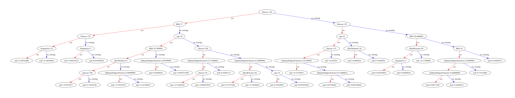

In [22]:
xgb.plot_tree(xgb_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

### Second tree plotted with XGBoost algorithm.

In [25]:
xgb.plot_tree(xgb_cl,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()
     

### Third tree plotted with XGBoost algorithm.

In [26]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()
     

## Using AutoML to find the best model.

In [26]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator
     

In [28]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222
     

In [29]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


This above code calculates the min_mem_size (minimum memory size) based on a percentage (pct_memory) of the available virtual memory on the system using the psutil library.

In [30]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:10442..... not found.
Attempting to start a local H2O server...
  Java Version: java version "20.0.2" 2023-07-18; Java(TM) SE Runtime Environment (build 20.0.2+9-78); Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from /Users/sanatpopli/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpmue0b24a
  JVM stdout: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpmue0b24a/h2o_sanatpopli_started_from_python.out
  JVM stderr: /var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/tmpmue0b24a/h2o_sanatpopli_started_from_python.err
  Server is running at http://127.0.0.1:10442
Connecting to H2O server at http://127.0.0.1:10442 ... successful.


--------------------------  ---------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.4
H2O_cluster_version_age:    1 month and 23 days
H2O_cluster_name:           H2O_from_python_sanatpopli_kxv041
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:10442
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.4 final
--------------------------  ---------------------------------

This above code snippet is attempting to start an H2O server with a randomly chosen port number in the range of 5555 to 55555 using the h2o.init function in Python. If an exception occurs during initialization, it logs the error, downloads all logs, shuts down the H2O cluster, and exits the script with a status code of 2.



In [31]:
data = h2o.import_file( './diabetes-dataset/diabetes.csv' )
     

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
data.head()

Pregnancies    Glucose    BloodPressure    SkinThickness    Insulin    BMI    DiabetesPedigreeFunction    Age    Outcome
-------------  ---------  ---------------  ---------------  ---------  -----  --------------------------  -----  ---------
            6        148               72               35          0   33.6                       0.627     50          1
            1         85               66               29          0   26.6                       0.351     31          0
            8        183               64                0          0   23.3                       0.672     32          1
            1         89               66               23         94   28.1                       0.167     21          0
            0        137               40               35        168   43.1                       2.288     33          1
            5        116               74                0          0   25.6                       0.201     30          0
            3         78               50               32         88   31                         0.248     26          1
           10        115                0                0          0   35.3                       0.134     29          0
            2        197               70               45        543   30.5                       0.158     53          1
            8        125               96                0          0    0                         0.232     54          1
[10 rows x 9 columns]

In [33]:
data.types

{'Pregnancies': 'int',
 'Glucose': 'int',
 'BloodPressure': 'int',
 'SkinThickness': 'int',
 'Insulin': 'int',
 'BMI': 'real',
 'DiabetesPedigreeFunction': 'real',
 'Age': 'int',
 'Outcome': 'int'}

In [34]:
data['Outcome'] = data['Outcome'].asfactor()
print(data['Outcome'].isfactor())
     

[True]


1)data['Outcome'].asfactor(): This converts the 'Outcome' column in the H2O data frame (data) to a factor type. Factors are categorical variables in H2O.

2)print(data['Outcome'].isfactor()): This prints whether the 'Outcome' column is a factor or not. The isfactor() method returns a boolean indicating whether the column is a factor.

In [35]:
data.describe()

Rows:768
Cols:9

Pregnancies        Glucose             BloodPressure       SkinThickness       Insulin             BMI                DiabetesPedigreeFunction    Age                 Outcome
-------  -----------------  ------------------  ------------------  ------------------  ------------------  -----------------  --------------------------  ------------------  ---------
type     int                int                 int                 int                 int                 real               real                        int                 enum
mins     0.0                0.0                 0.0                 0.0                 0.0                 0.0                0.078                       21.0
mean     3.845052083333336  120.89453125        69.10546874999994   20.536458333333357  79.79947916666666   31.99257812500003  0.4718763020833334          33.240885416666615
maxs     17.0               199.0               122.0               99.0                846.0               67.1               2.42                        81.0
sigma    3.36957806269887   31.972618195136224  19.355807170644777  15.952217567727642  115.24400235133803  7.884160320375441  0.331328595012775           11.760231540678689
zeros    111                5                   35                  227                 374                 11                 0                           0
missing  0                  0                   0                   0                   0                   0                  0                           0                   0
0        6.0                148.0               72.0                35.0                0.0                 33.6               0.627                       50.0                1
1        1.0                85.0                66.0                29.0                0.0                 26.6               0.351                       31.0                0
2        8.0                183.0               64.0                0.0                 0.0                 23.3               0.672                       32.0                1
3        1.0                89.0                66.0                23.0                94.0                28.1               0.167                       21.0                0
4        0.0                137.0               40.0                35.0                168.0               43.1               2.288                       33.0                1
5        5.0                116.0               74.0                0.0                 0.0                 25.6               0.201                       30.0                0
6        3.0                78.0                50.0                32.0                88.0                31.0               0.248                       26.0                1
7        10.0               115.0               0.0                 0.0                 0.0                 35.3               0.134                       29.0                0
8        2.0                197.0               70.0                45.0                543.0               30.5               0.158                       53.0                1
9        8.0                125.0               96.0                0.0                 0.0                 0.0                0.232                       54.0                1
[768 rows x 9 columns]

In [36]:
data.shape

(768, 9)

In [37]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [38]:
print(data_train.shape)
print(data_test.shape)

(617, 9)
(151, 9)


In [39]:
data_train.head(2)

Pregnancies    Glucose    BloodPressure    SkinThickness    Insulin    BMI    DiabetesPedigreeFunction    Age    Outcome
-------------  ---------  ---------------  ---------------  ---------  -----  --------------------------  -----  ---------
            1         85               66               29          0   26.6                       0.351     31          0
            1         89               66               23         94   28.1                       0.167     21          0
[2 rows x 9 columns]

In [40]:
# Set the features and target
X=data.columns
print(X)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [41]:
# Set target and predictor variables
y ='Outcome'
#y_numeric ='churn_bit'
X.remove(y) 
#X.remove(y_numeric) 
print(X)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In above snippet we are working with a dataset and we are setting the target variable (y) and predictor variables (X). Additionally, it appears that we are removing the target variable from the predictor variables.

In [42]:
# Set up AutoML
auml = H2OAutoML(max_runtime_secs=run_time, seed=1)

1)H2OAutoML is the class responsible for running the AutoML process using H2O.ai.
auml is an instance of the H2OAutoML class.

2)max_runtime_secs is a parameter that sets the maximum time, in seconds, that the AutoML process is allowed to run. The AutoML will stop after this duration, and the best model found up to that point will be selected.

3)seed is a parameter that sets the random seed for reproducibility. Setting a seed ensures that the random processes within the AutoML, such as random hyperparameter searches, will be the same each time you run the AutoML with the same seed. This can be useful for reproducibility and debugging.

In [43]:
auml.train(x=X,y=y,training_frame=data_train)

AutoML progress: |
17:23:06.814: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_lr_annealing_selection_AutoML_1_20231126_172306_select_model


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    34                 34                          7808                   4            4            4             10            16            13.6471

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08710257535259014
RMSE: 0.2951314543599007
LogLoss: 0.30294194841482486
Mean Per-Class Error: 0.11217065506405607
AUC: 0.9579647087261302
AUCPR: 0.9214650553373658
Gini: 0.9159294174522603

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4371125002474735
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      394  26   0.0619   (26.0/420.0)
1      32   165  0.1624   (32.0/197.0)
Total  426  191  0.094    (58.0/617.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.437113     0.850515  149
max f2                       0.211962     0.886722  234
max f0point5                 0.455698     0.863192  140
max accuracy                 0.437113     0.905997  149
max precision                0.923702     1         0
max recall                   0.0843753    1         338
max specificity              0.923702     1         0
max absolute_mcc             0.437113     0.78218   149
max min_per_class_accuracy   0.370765     0.878571  178
max mean_per_class_accuracy  0.418798     0.889648  159
max tns                      0.923702     420       0
max fns                      0.923702     196       0
max fps                      0.0353737    420       399
max tps                      0.0843753    197       338
max tnr                      0.923702     1         0
max fnr                      0.923702     0.994924  0
max fpr                      0.0353737    1         399
max tpr                      0.0843753    1         338

Gains/Lift Table: Avg response rate: 31.93 %, avg score: 32.08 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113452                   0.895556           3.13198    3.13198            1                0.902221   1                           0.902221            0.035533        0.035533                   213.198   213.198            0.035533
2        0.0210697                   0.886468           3.13198    3.13198            1                0.890877   1                           0.896985            0.0304569       0.0659898                  213.198   213.198            0.0659898
3        0.0307942                   0.880105           3.13198    3.13198            1                0.882295   1                           0.892346            0.0304569       0.0964467                  213.198   213.198            0.0964467
4        0.0405186                   0.865363           3.13198    3.13198            1                0.871786   1                           0.887412            0.0304569       0.126904                   213.198   213.198            0.126904
5        0.0502431                   0.856167           3.13198    3.13198            1                0.860992   1         

1)auml: This is your H2O AutoML object.

2)train: This method is used to initiate the training process.

3)x=X, y=y: Here, X represents the list of predictor variables, and y represents the target variable. This specifies the features (X) and the target variable (y) for training the model.

4)training_frame=data_train: This specifies the H2O frame (data_train) containing the training data. The training data includes both the predictor variables (X) and the target variable (y).

In [44]:
print(auml.leaderboard)

model_id                                                               auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_lr_annealing_selection_AutoML_1_20231126_172306_select_model  0.844797   0.452405  0.696034                0.217404  0.383708  0.147232
GBM_grid_1_AutoML_1_20231126_172306_model_2                       0.844507   0.453283  0.694419                0.221537  0.384114  0.147544
StackedEnsemble_BestOfFamily_4_AutoML_1_20231126_172306           0.843739   0.453926  0.682111                0.220347  0.383708  0.147232
StackedEnsemble_BestOfFamily_6_AutoML_1_20231126_172306           0.842307   0.454563  0.696589                0.223513  0.383762  0.147274
StackedEnsemble_AllModels_5_AutoML_1_20231126_172306              0.839255   0.473682  0.690936                0.236228  0.398503  0.158805
GBM_grid_1_AutoML_1_20231126_172306_model_43                      0.83847    0.455764  0.688552                0.231218  0.386189  0.149142
StackedEnsemble_AllM

The print(auml.leaderboard) statement would typically display the leaderboard of models generated by the H2O AutoML process. The leaderboard provides information about each model, such as model ID, model type, performance metrics, and other details.

In [48]:
model_index=0
glm_index=0
glm_model=''
auml_leaderboard_df=auml.leaderboard.as_data_frame()
models_dict={}
for m in auml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in auml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_lr_annealing_selection_AutoML_1_20231126_172306_select_model': 0,
 'GLM_1_AutoML_1_20231126_172306': 50}

we're working with H2O's AutoML (auml) in Python. The code we provided in above cell is creating a dictionary (models_dict) where the keys are model IDs and the values are corresponding indices. The indices are determined based on the order of appearance of different types of models in the leaderboard.

Here's a breakdown of the code:

1)model_index and glm_index are initialized to 0.
2)A loop is used to iterate through the model IDs in the AutoML leaderboard (auml_leaderboard_df).
3)For each model ID, the code updates the dictionary (models_dict) with the model ID as the key and the current index (model_index or glm_index) as the value.
4)The loop breaks when it encounters a model ID that does not contain 'StackedEnsemble', and the model_index is incremented.
5)Another loop is used to find the index of the first model ID that contains 'GLM', and the corresponding glm_index is updated.

In [50]:
print(model_index)
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id'])

0


3.Use auto ml to find the best model
Ans: Using AutoML, we have conclude'GBM' as the best model to determine whether a patient has diabetes. By referring the below variable importance and shap summary plots, we can say that 'Glucose' is the most important and dominant feature in the model to predict target variable. Where as, the least important features are 'Insulin' and 'Skin thickness' according to variable importance and shap summary plots respectively.

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_lr_annealing_selection_AutoML_1_20231126_172306_select_model

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43711251080782165
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      394  26   0.0619   (26.0/420.0)
1      32   165  0.1624   (32.0/197.0)
Total  426  191  0.094    (58.0/617.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

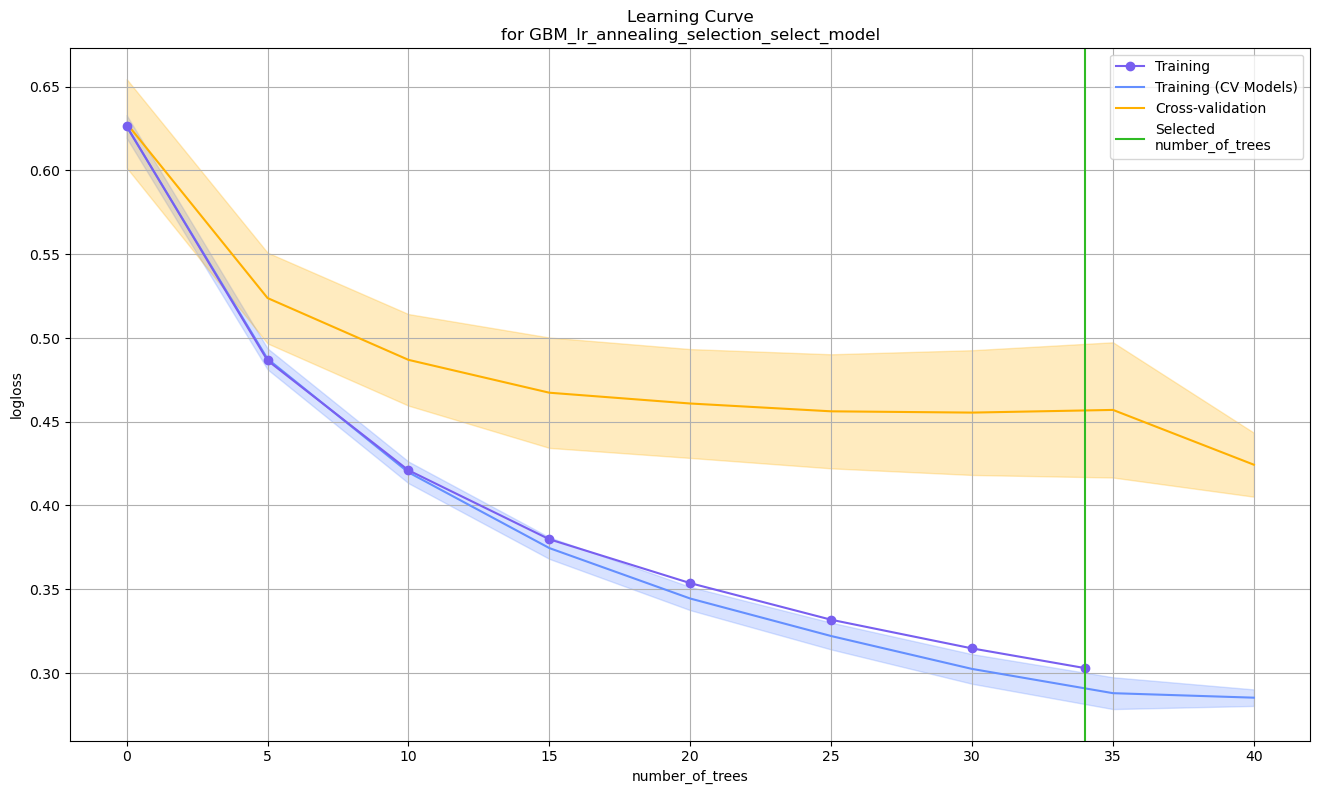

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

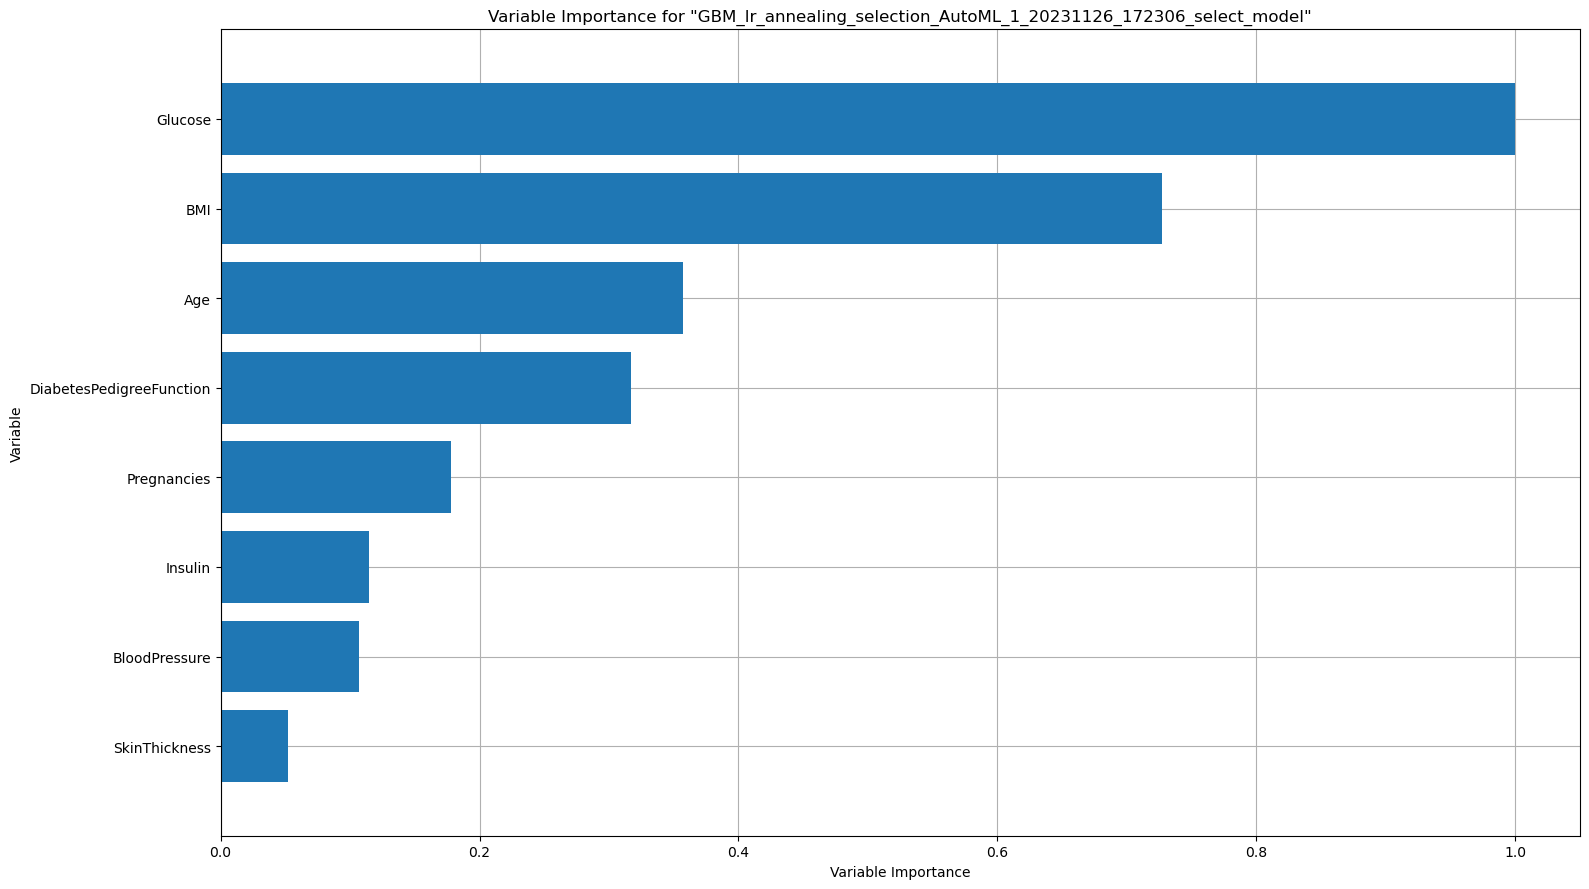

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

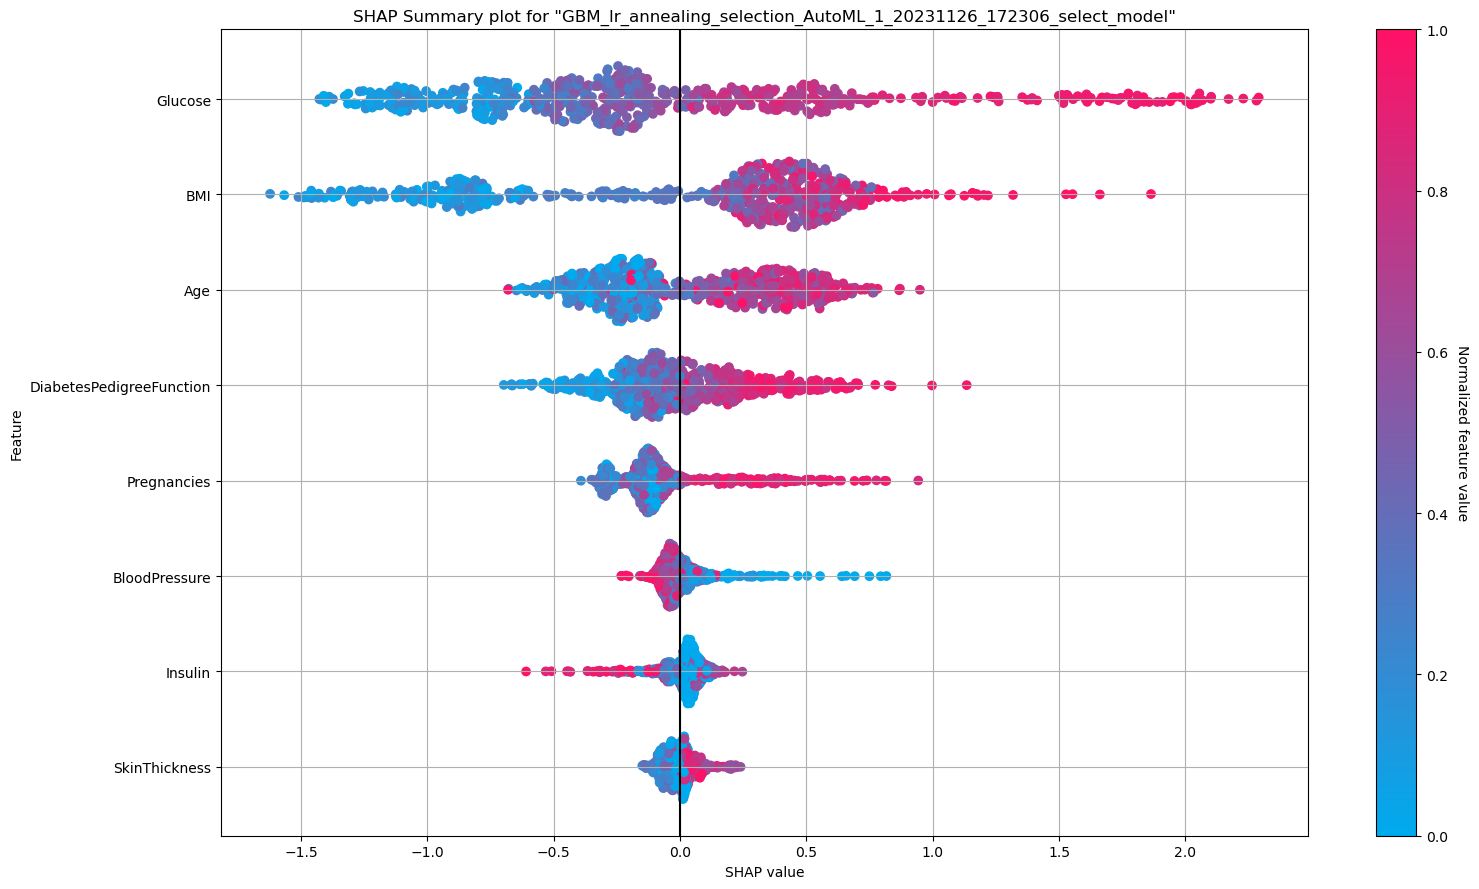

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

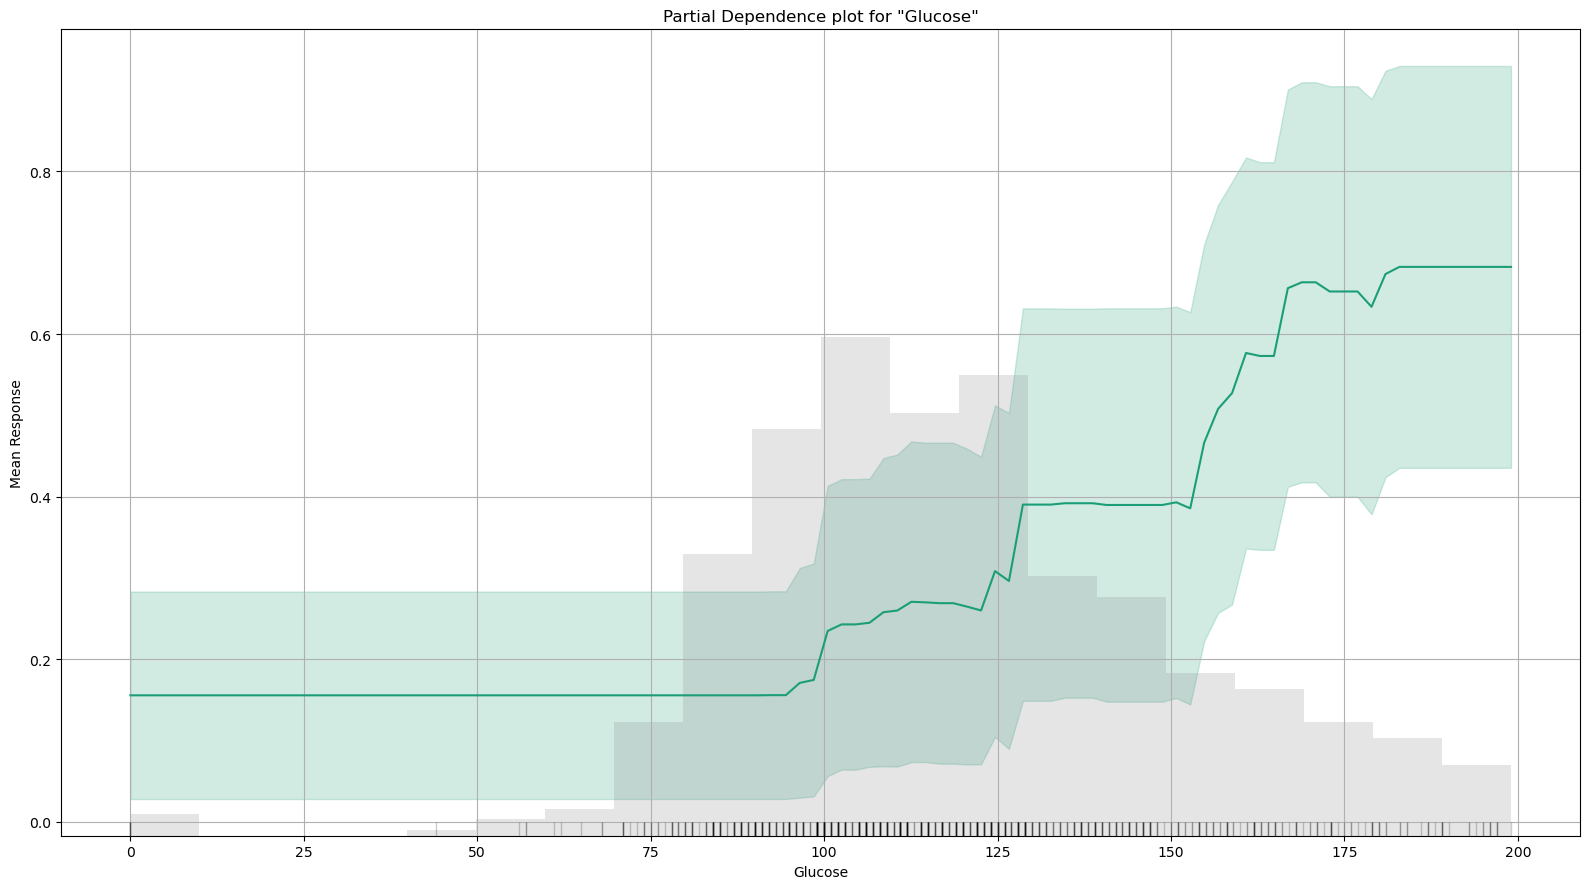

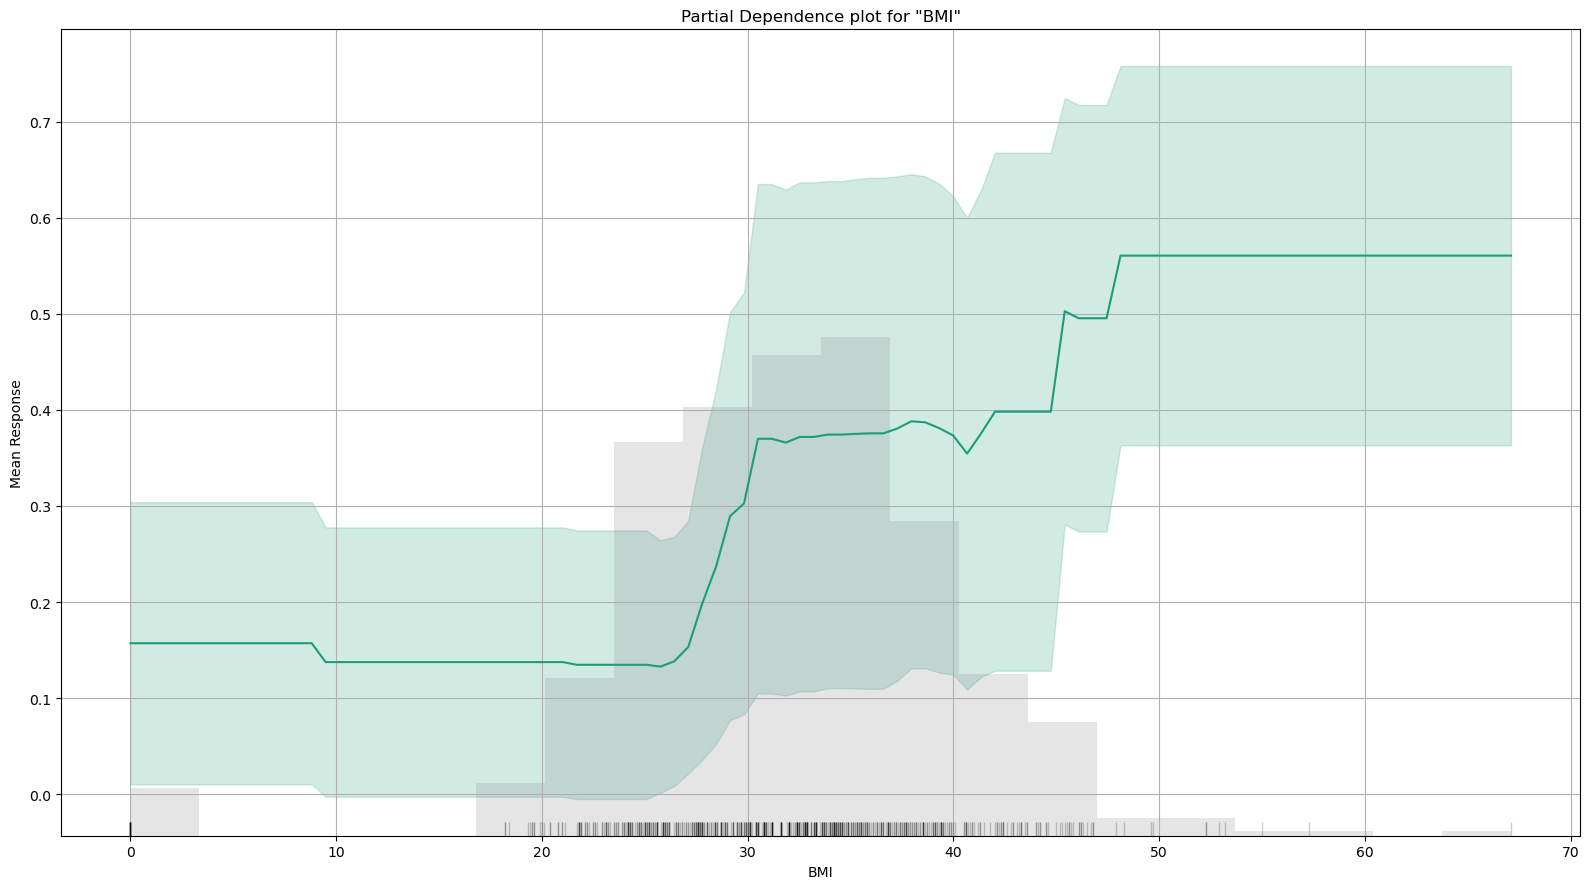

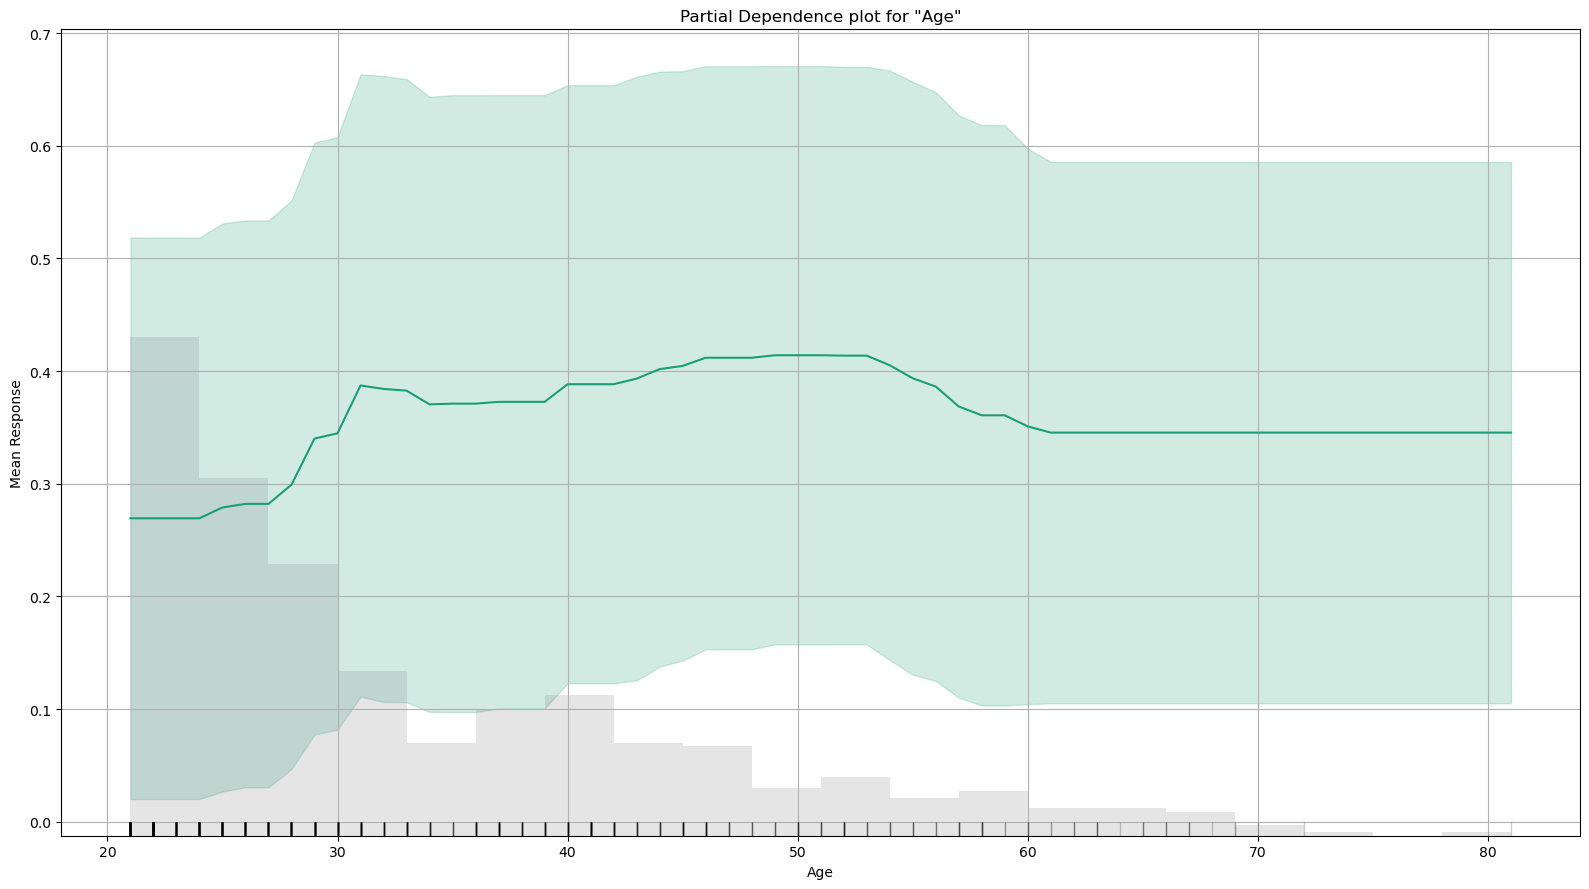

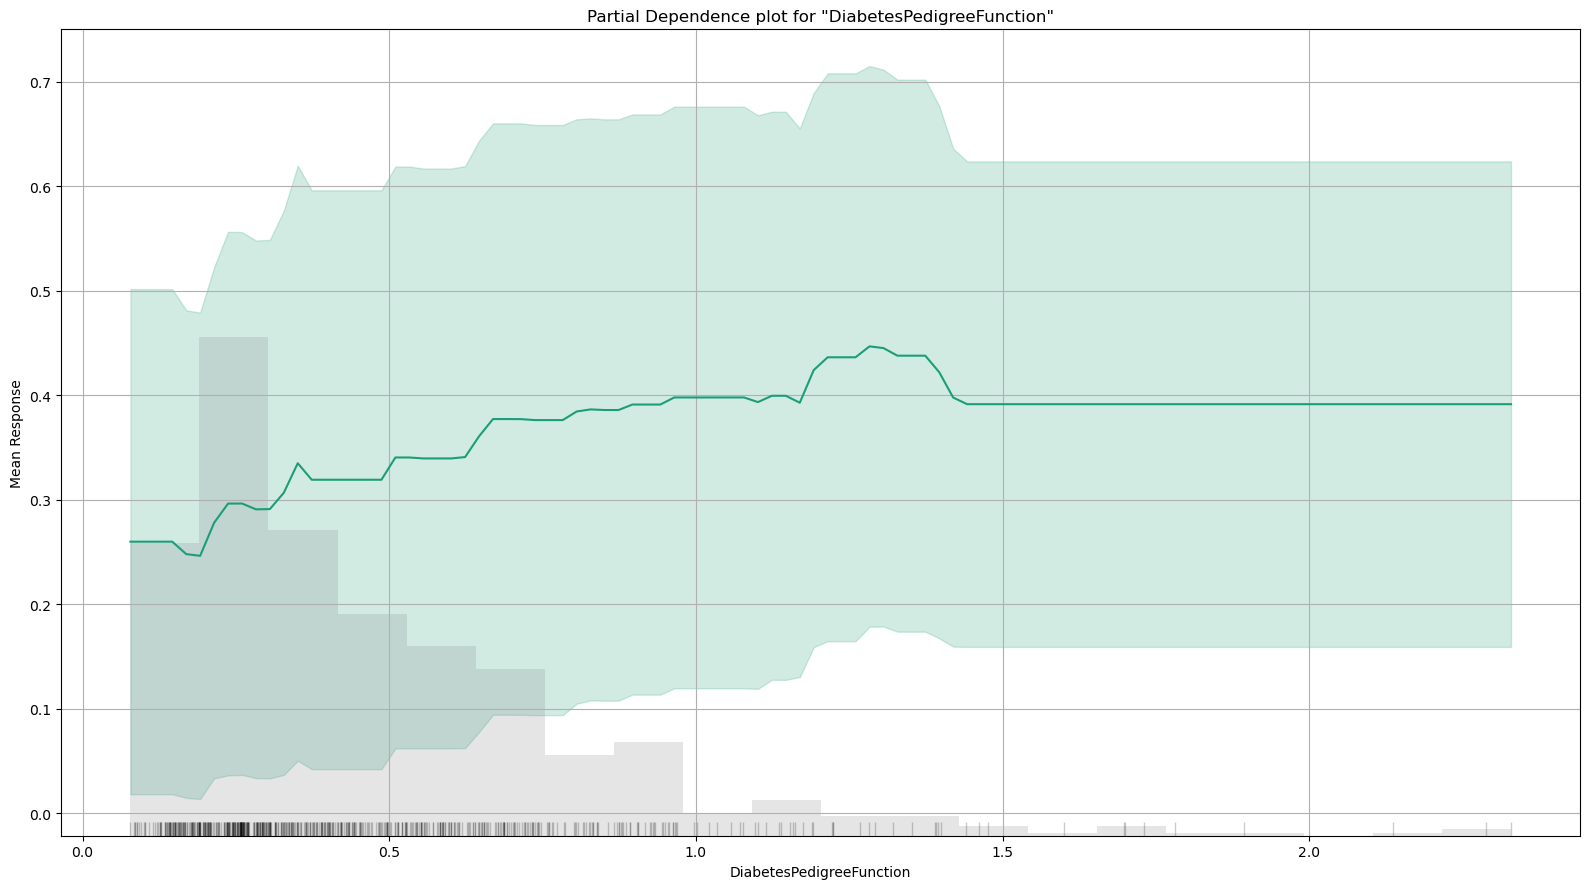

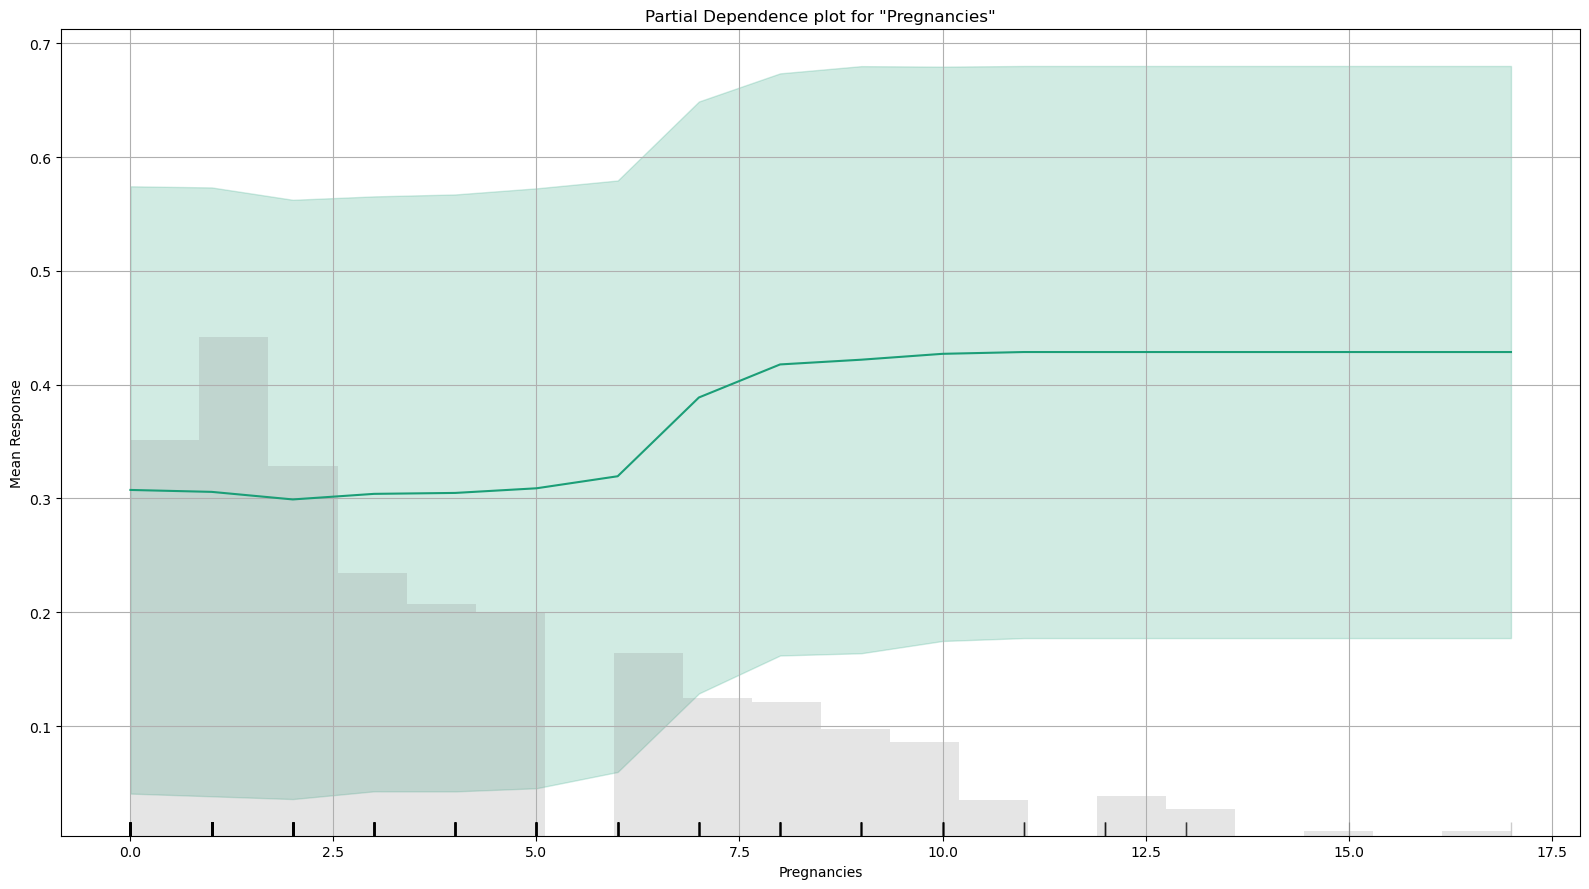

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_lr_annealing_selection_AutoML_1_20231126_172306_select_model

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43711251080782165
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      394  26   0.0619   (26.0/420.0)
1      32   165  0.1624   (32.0/197.0)
Total  426  191  0.094    (58.0/617.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [52]:
best_model.explain(data_train)

We're using a method called explain on a model named best_model with training data "data_train". However, the specific implementation of the explain method and its parameters depend on the machine learning library or framework we're using. Different libraries may have different ways of implementing model explanation methods.

In [51]:
best_model.algo

'gbm'

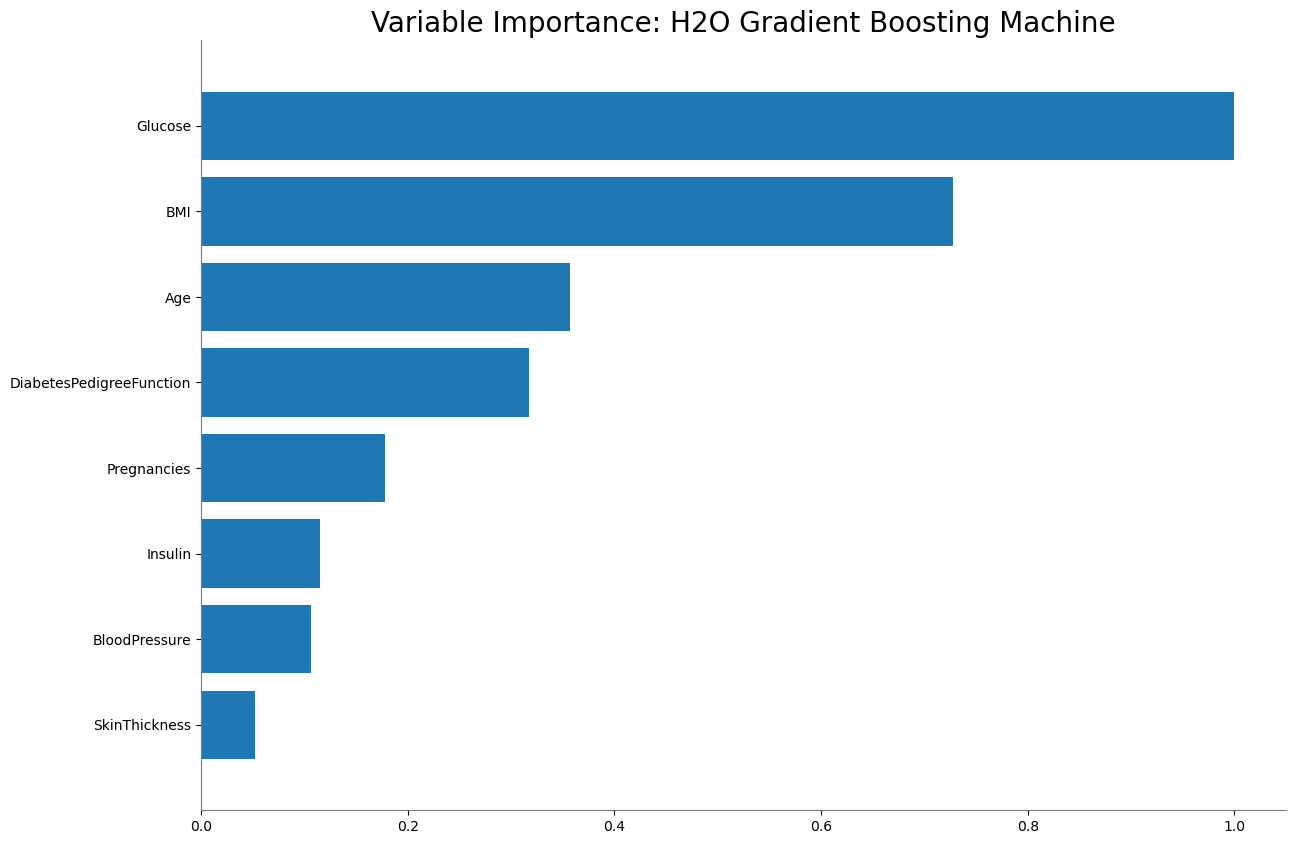

<Figure size 50000x10000 with 0 Axes>

In [53]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

Above code checks if the algorithm of best_model is one of the specified algorithms. If it is, it calls the varimp_plot() method to generate the variable importance plot.

50
glm


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/1f/v8y4nmrn2pqgk1h_k7qvrd100000gn/T/ipykernel_23498/2475395662.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


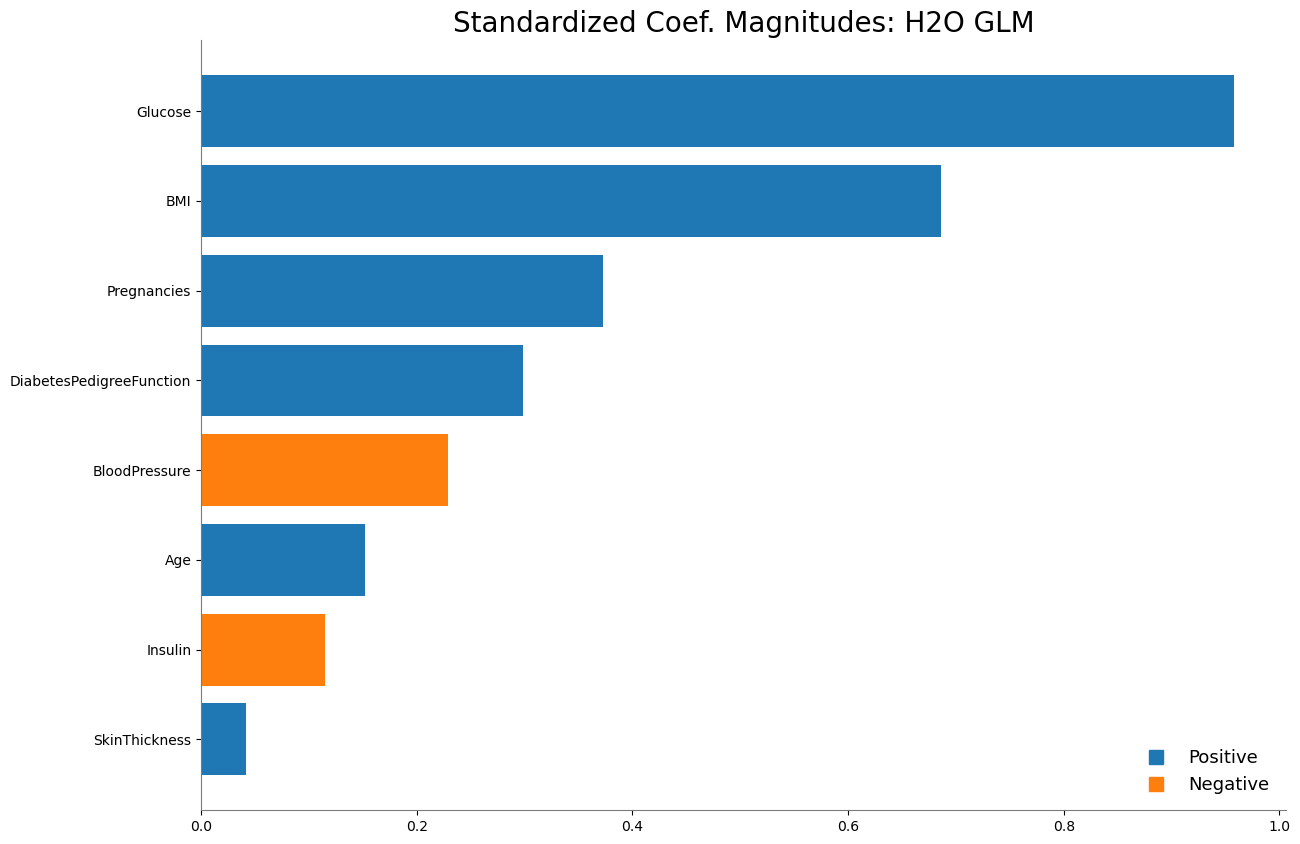

In [55]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(auml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In above cell's code ,We have a conditional block in our code that checks if glm_index is not equal to 0. If this condition is true, it prints the value of glm_index, retrieves an H2O model using the model ID from the leaderboard, prints the algorithm used by the model, and finally, it calls std_coef_plot() on the glm_model.

In [56]:
print(best_model.auc(train = True))

0.9579647087261302


The above print() command prints the area under curve for the best suitable algorithm ie GBM and area under curve is 95.79%

In [57]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

We've defined a function model_performance_stats(perf) in above cell's code that takes an H2O performance object (perf) and tries to extract various performance metrics from it. The function uses try-except blocks to handle cases where a specific metric may not be available for the given performance object.

This function attempts to calculate various metrics related to model performance and stores them in a dictionary (d). If a specific metric calculation fails , the corresponding except block catches the exception, and the metric is not added to the dictionary.

the success of calculating these metrics depends on the nature of the model and the type of performance object passed to the function. The function is designed to be robust by handling potential exceptions gracefully.

In [59]:
mod_perf=best_model.model_performance(data_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.19612667738823725,
 'rmse': 0.4428619168411721,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.5754079946538894,
 'auc': 0.8110915492957746,
 'gini': 0.6221830985915493}

We're using our model_performance_stats function to extract various performance metrics from the performance of the best_model on the test data (data_test). This is a common approach to evaluate and understand the performance of a trained model on new or unseen data.

This will print or display a dictionary (stats_test) containing the computed performance metrics.

## Initialising the shap analysis on the model from step 1,2,3

In [60]:
!pip install shap

Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.
Ans:

After running SHAP analysis on model 1 (i.e. Logistic Regression), we have found that 'Glucose' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'Skin Thickness' is the least important feature. According to beeswarm plot, higher value of 'Glucose' (2) leads to lower chance of diabetes. Lower value of 'Glucose' (1) leads to higher chance of diabetes. Similarly, BMI, pregnencies, AGE, SMOKING, ALCOHOL_CONSUMING, ALLERGY have negative impact on output. While, Insulin, BloodPressure, ANXIETY,have positive impact on model output.

For model 2 (i.e. XGBoost), 'Glucose' and 'Skin Thickness' are the most and least significant features respectively contributing towards prediction of diabetes. According to summary plot, higher value of 'Glucose' leads to lower chance of diabetes. Lower value of 'Glucose' leads to higher chance of diabetes.

As per model 3 (i.e. GBM), by referring the above shap summary plot, 'Glucose' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'Skin Thickness' is less important.

So, all 3 algorithms shows amost same results in terms of most and least dominant.



In [61]:
import shap

In [62]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

1)shap.Explainer(logreg, x_train): This creates a SHAP explainer object (lg_explainer) for your logistic regression model (logreg) based on the training data (x_train).

2)lg_explainer.shap_values(x_test): This calculates the SHAP values for the test set (x_test). The resulting shap_values_lg will contain the Shapley values for each feature and each instance in the test set.

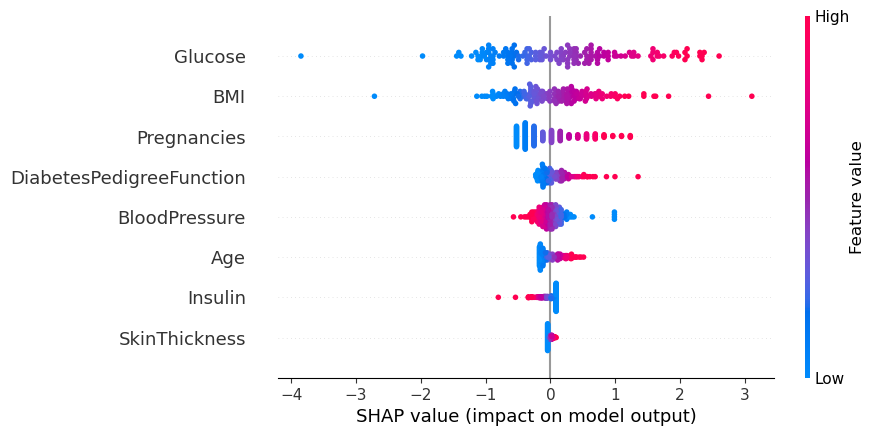

In [63]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

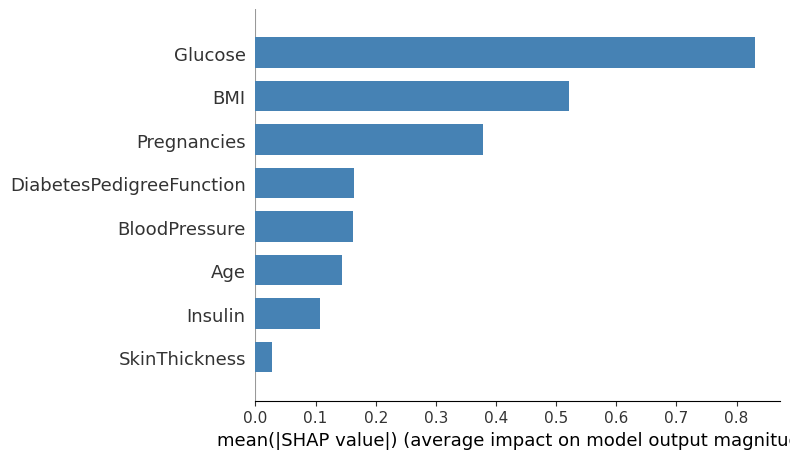

In [64]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

In [65]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

[17:35:15] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


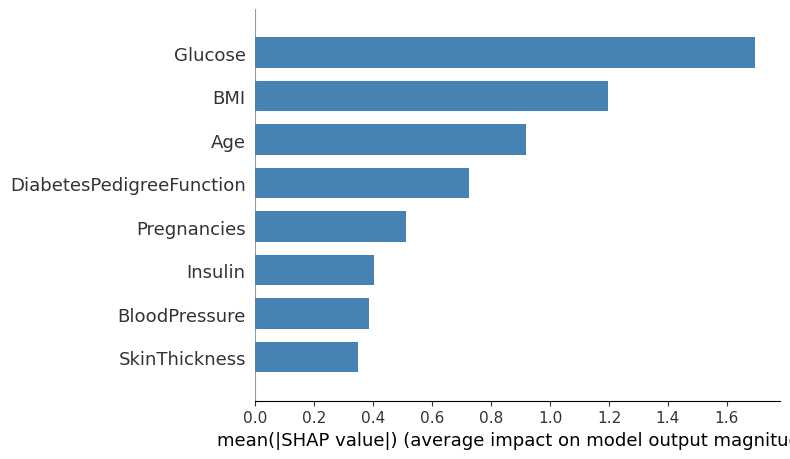

In [66]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

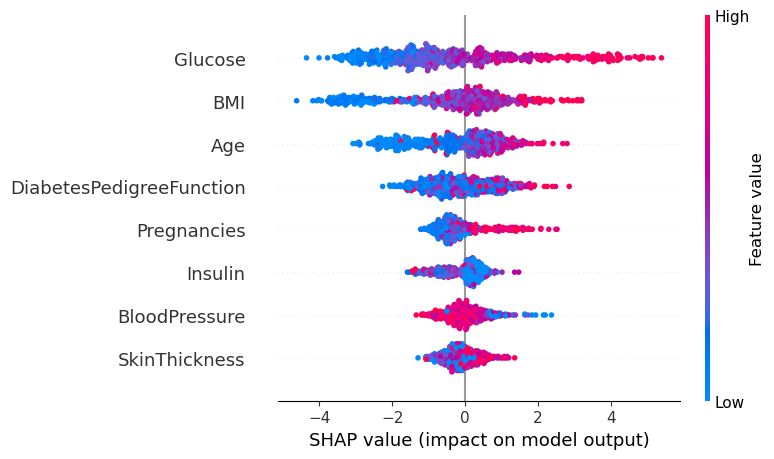

In [67]:
shap.summary_plot(shap_values, x_train)

## Questions and their answers-

1)Fit a linear model and interpret the regression coefficients-

Ans: When the variable DiabetesPedigreeFunction is increased by one unit, the odds of having Diabetes in the target class ("2") increase by more than 1x (i.e. 4.6509) compared to the odds of not having Diabetes in the target class. In contrast, as BloodPressure concentration rises by one unit, the chances of lung cancer in the target class rise by only 0.982730.

2)Fit a tree-based model and interpret the nodes

Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'Glucose'. Node interpretability for first 3 trees is shown below.

3)Use auto ml to find the best model

Ans: Using AutoML, we have conclude'GBM' as the best model to determine whether a patient has diabetes. By referring the below variable importance and shap summary plots, we can say that 'Glucose' is the most important and dominant feature in the model to predict target variable. Where as, the least important features are 'Insulin' and 'Skin thickness' according to variable importance and shap summary plots respectively.

4)Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Ans:After running SHAP analysis on model 1 (i.e. Logistic Regression), we have found that 'Glucose' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'Skin Thickness' is the least important feature. According to beeswarm plot, higher value of 'Glucose' (2) leads to lower chance of diabetes. Lower value of 'Glucose' (1) leads to higher chance of diabetes. Similarly, BMI, pregnencies, AGE, SMOKING, ALCOHOL_CONSUMING, ALLERGY have negative impact on output. While, Insulin, BloodPressure, ANXIETY,have positive impact on model output.

For model 2 (i.e. XGBoost), 'Glucose' and 'Skin Thickness' are the most and least significant features respectively contributing towards prediction of diabetes. According to summary plot, higher value of 'Glucose' leads to lower chance of diabetes. Lower value of 'Glucose' leads to higher chance of diabetes.

As per model 3 (i.e. GBM), by referring the above shap summary plot, 'Glucose' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'Skin Thickness' is less important.

So, all 3 algorithms shows amost same results in terms of most and least dominant.






### Conclusion

Build a predictive model using Logistic regression, XGBoost, AutoML to predict whether a patient has diabetes based on a set of risk factors. Model interpretability was tested using shap analysis by plotting beeswarm and shap summary plots to compare all three models. We discovered that all three algorithms produce distinct outcomes, and that regularization can be used to improve the models.

## License

Copyright (c) 2022 Sanat Popli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### References
1)https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

2)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

3)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

4)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

5)https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

6)https://www.datacamp.com/community/tutorials/xgboost-in-python

7)https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb

